<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#はじめに" data-toc-modified-id="はじめに-1">はじめに</a></span></li><li><span><a href="#User's-guide" data-toc-modified-id="User's-guide-2">User's guide</a></span><ul class="toc-item"><li><span><a href="#初期化" data-toc-modified-id="初期化-2.1">初期化</a></span><ul class="toc-item"><li><span><a href="#figure" data-toc-modified-id="figure-2.1.1">figure</a></span><ul class="toc-item"><li><span><a href="#(1)-figureの作成と1枚のaxesの追加" data-toc-modified-id="(1)-figureの作成と1枚のaxesの追加-2.1.1.1">(1) figureの作成と1枚のaxesの追加</a></span></li><li><span><a href="#(2)-figureの作成と複数のaxesの追加" data-toc-modified-id="(2)-figureの作成と複数のaxesの追加-2.1.1.2">(2) figureの作成と複数のaxesの追加</a></span></li></ul></li><li><span><a href="#subplots" data-toc-modified-id="subplots-2.1.2">subplots</a></span></li></ul></li><li><span><a href="#Object-Oriented-(OO)-style" data-toc-modified-id="Object-Oriented-(OO)-style-2.2">Object-Oriented (OO) style</a></span></li><li><span><a href="#py-plot-style" data-toc-modified-id="py-plot-style-2.3">py-plot style</a></span></li><li><span><a href="#Backends" data-toc-modified-id="Backends-2.4">Backends</a></span></li><li><span><a href="#様々な例" data-toc-modified-id="様々な例-2.5">様々な例</a></span></li><li><span><a href="#等高線プロットを作る" data-toc-modified-id="等高線プロットを作る-2.6">等高線プロットを作る</a></span></li></ul></li><li><span><a href="#日本語に対応させる" data-toc-modified-id="日本語に対応させる-3">日本語に対応させる</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-4">Examples</a></span><ul class="toc-item"><li><span><a href="#棒グラフ" data-toc-modified-id="棒グラフ-4.1">棒グラフ</a></span><ul class="toc-item"><li><span><a href="#積み上げ棒グラフ" data-toc-modified-id="積み上げ棒グラフ-4.1.1">積み上げ棒グラフ</a></span></li></ul></li><li><span><a href="#DataFrameから横並びの棒グラフを作る" data-toc-modified-id="DataFrameから横並びの棒グラフを作る-4.2">DataFrameから横並びの棒グラフを作る</a></span></li></ul></li><li><span><a href="#FAQ" data-toc-modified-id="FAQ-5">FAQ</a></span><ul class="toc-item"><li><span><a href="#範囲外にプロットされてしまう" data-toc-modified-id="範囲外にプロットされてしまう-5.1">範囲外にプロットされてしまう</a></span></li></ul></li></ul></div>

# はじめに

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlibには2つのインターフェースがあるので、まず初めにそれを理解することが先決。

- オブジェクト指向（object oriented : OO）インターフェース
- state based インターフェース（`pyplot`モジュールを通じて操作する）

matplotlibのチュートリアルでは

> In general, try to use the object-oriented interface over the pyplot interface. 

と説明書きがなされている。チュートリアルで示されているコードを読む限り、全てをOOで行うのではなくて、プロットの細部をいじるときにはOOインターフェースで操作し、全体的なスタイルを設定するときは`pyplot`インターフェースで操作していくのが良い感じを受けた。

OOインターフェースでは2つのオブジェクトを通じてプロットを行う（命名が感覚と若干ずれるかもなので、しっかりと頭に入れよう）

- axes : 個々のプロット（x軸、y軸といった「軸」ではないので注意！）。ちなみに発音は「アクシィズ」
    - キャンバスの一部、のようなもの
- figure ：　1つ以上のAxesを含んだ最終的なイメージ
    - キャンバス（描画領域全体）のようなもの

# User's guide
## 初期化

描画を開始する時に

- 描画領域Figureのみを作成する -->plt.figure()
- 描画領域Figureと実際のAxesを同時に作成する --> plt.subplots()

という手法が考えられる。ここで注意しなければならないのは、 「プロット」という言葉の持つ意味である。matplotlibでは、「このプロットの軸大きくして」とか「このプロットもっと綺麗に作ってよ」の意味でのプロットは、`Axes`である。matplotlibで「プロット」というと、`Axes`を作成する作業を指す、と理解しておけば及第点かも。

### figure

- figureの作成
- add_subplot、subplot で figure に axes を追加する

In [2]:
x_data = np.linspace(0,np.pi*2,100)

#### (1) figureの作成と1枚のaxesの追加

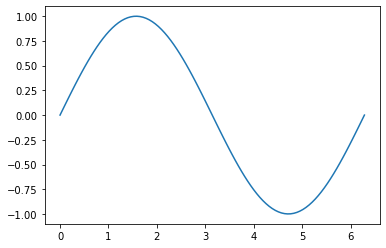

In [3]:
fig = plt.figure() 
ax = fig.add_subplot()
ax.plot(x_data, np.sin(x_data))

#### (2) figureの作成と複数のaxesの追加

通常通り`figure`で描画領域を作成したのち、`add_subplot`で追加する`axes`の枚数を管理できる。以下の例だと $2\times2$に分割して、1番目と6番目にプロットする、という流れ。

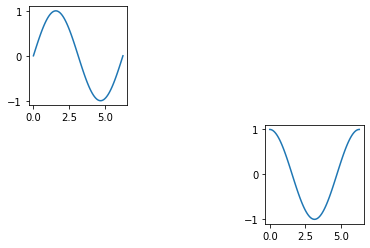

In [4]:
fig = plt.figure() 

# 1番目
ax = fig.add_subplot(2,3,1)
ax.plot(x_data, np.sin(x_data))

# 6番目
ax = fig.add_subplot(2,3,6)
ax.plot(x_data, np.cos(x_data))

同様のことは `subplot`メソッドを用いることで実現できる。が、「直近で作成されたfigureに追加する」という手法のため、「このfigureにはこのaxesを、こっちにはこれを...」と言った細かい作業ができなくなる恐れがある。使用しないほうが吉。（そもそも`plt`インターフェースでの作業であり、OOインターフェースでないので推奨はされていない）

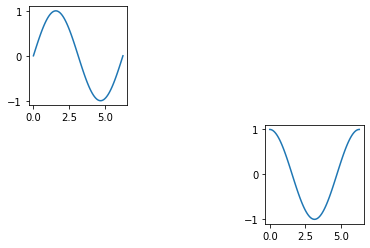

In [5]:
fig = plt.figure() 

# 1番目
ax = plt.subplot(2,3,1)
ax.plot(x_data, np.sin(x_data))

# 6番目
ax = plt.subplot(2,3,6)
ax.plot(x_data, np.cos(x_data))

### subplots

- figureとaxesを同時に作成する
- 引数に行数、列数を渡すことで複数のaxesを作成できる

AxesSubplot(0.125,0.125;0.775x0.755)


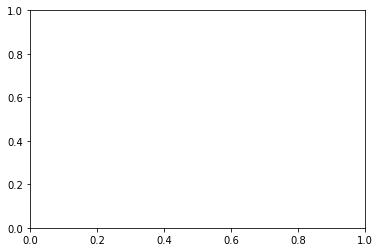

In [6]:
fig, axes = plt.subplots()
print(axes)

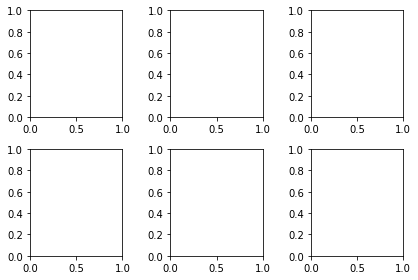

In [7]:
fig, axes = plt.subplots(2,3)
plt.tight_layout()

複数のAxesを作ったときは、返り値のaxesは配列として返ってくる。それを利用して、どのaxesに描画するかを指定することができる。指定の仕方が配列チックなことに注意しておこう（直感的には`add_subplot`で指定した方法のほうが分かりやすいかも。）

In [8]:
type(axes)

numpy.ndarray

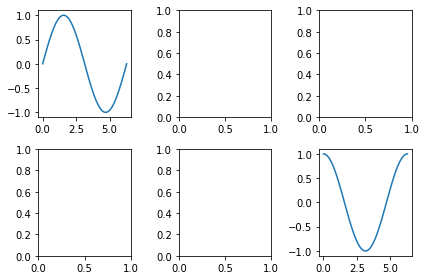

In [9]:
fig, axes = plt.subplots(2,3)
plt.tight_layout()
axes[0,0].plot(x_data, np.sin(x_data))
axes[1,2].plot(x_data, np.cos(x_data))

## Object-Oriented (OO) style
`subplots`を使ってfigureと軸を作成し、それらのメソッドを通じて見栄えを整えていく方法。

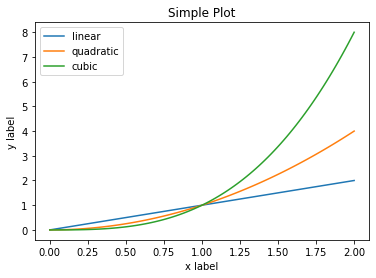

In [10]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()

ax.plot(x, x, label="linear")
ax.plot(x, x**2, label="quadratic")
ax.plot(x, x**3, label="cubic")

# 軸のラベル
ax.set_xlabel("x label")
ax.set_ylabel("y label")

# figureのタイトル
ax.set_title("Simple Plot")

# 凡例
ax.legend()

## py-plot style
pyplot に自動的にfigureと軸を作ってもらい、あとはpyplotを通じて見栄えを整えていくスタイル。裏側ではFigureとAxesが同様に作成されているのだが、そこには深入りせず簡便なインターフェースを通じて操作していく方法である。

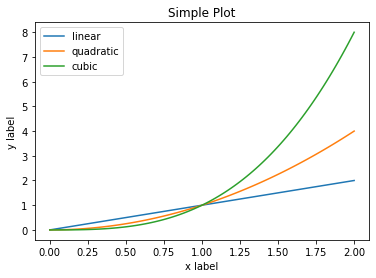

In [11]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label="linear")
plt.plot(x, x**2, label="quadratic")
plt.plot(x, x**3, label="cubic")

# 軸のラベル
plt.xlabel("x label")
plt.ylabel("y label")

# figureのタイトル
plt.title("Simple Plot")

# 凡例
plt.legend()

OO-styleとpyplot-styleのどちらを使えばいいかという問題に対しては、「使い分けよう」と答える。例えばjupyterの様なインタラクティブな環境では、pyplot-styleのほうが優れているし、スクリプト等でがっつり書くときにはOO-styleのほうがよいとされている。

## Backends
matplotlib は様々な環境で使用されており（インタラクティブシェル、jupyter、PyQt, PyGObject ...）それらに合わせた出力が必要となる。そこでmatplotlibは出力を"バックエンド"と呼ばれる仕組みでコントロールすることができる。

## 様々な例

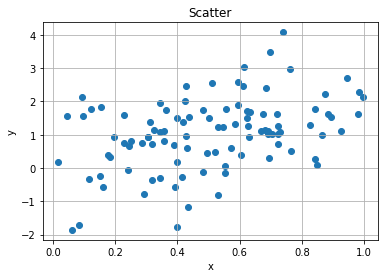

In [12]:
#フォントサイズ
plt.rcParams["font.size"]=10

np.random.seed(123)
x = np.random.rand(100)
y = 2*x + np.random.randn(100)

# 散布図
plt.scatter(x, y)

plt.title("Scatter")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

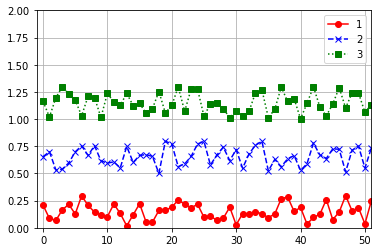

In [13]:
np.random.seed(123)

plt.plot(0+0.3 * np.random.rand(100), c='r', marker='o', linestyle='-',  label='1')
plt.plot(0.5+0.3 * np.random.rand(100), c='b', marker='x', linestyle='--',  label='2')
plt.plot(1+0.3 * np.random.rand(100), c='g', marker='s', linestyle=':',  label='3')

plt.xlim(-1, 51)
plt.ylim(0, 2.0)

plt.legend(loc="upper right", prop={'size':10})
plt.grid()
plt.show()

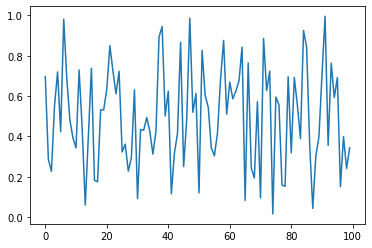

In [14]:
np.random.seed(123)

# Figureクラスを明示的にインスタンス化している
fig = plt.figure()

# AxesSubplotクラスをインスタンス化する
ax = fig.gca()

ax.plot(np.random.rand(100))

Figureクラスを明示的にインスタンス化することで、複数枚のプロットを扱うときに非常に見通しが良くなっていく。次の例では複数枚のプロットを扱ってみる。

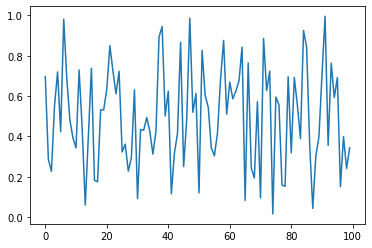

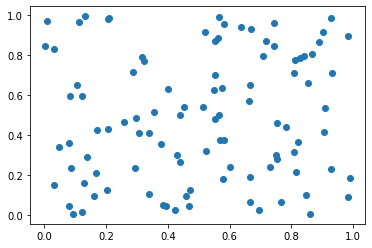

In [15]:
np.random.seed(123)

# Figureクラスのインスタンスを作成
fig1, fig2 = plt.figure(1), plt.figure(2)

# Figure1について処理を行う
plt.figure(1)
plt.plot(np.random.rand(100))

# Figure2について処理を行う
plt.figure(2)
plt.scatter(np.random.rand(100), np.random.rand(100))

plt.show()

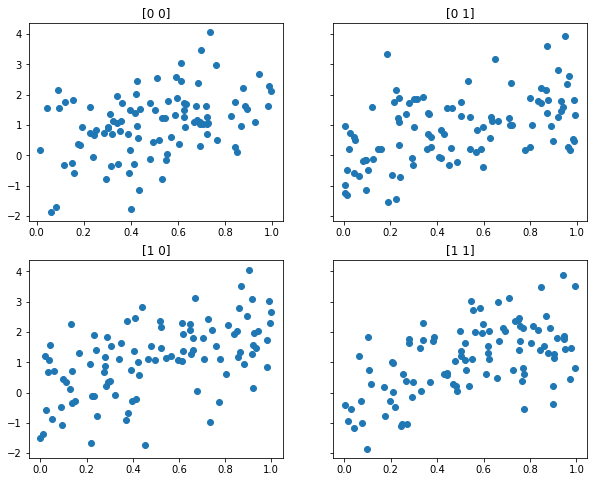

In [16]:
fig, ax = plt.subplots(2,2, figsize=(10,8), sharey=True)
# sharey：全ての図の縦軸の範囲を揃えるためのフラグ。同様にsharex=Trueとすればx軸の範囲も揃えることができる。


np.random.seed(123)
nrow, ncol = ax.shape

for i in range(nrow):
    for j in range(ncol):
        x = np.random.rand(100)
        y = 2*x + np.random.randn(100)
        
        ax[i, j].scatter(x, y)
        ax[i, j].set_title("[{} {}]".format(i, j))

## 等高線プロットを作る

In [17]:
# 格子点の座標を用意
x = np.arange(-5, 6) #-5~5の整数を用意
y = np.arange(-5, 6) #上と同じ

#格子点座標の作成
xx, yy = np.meshgrid(x, y) 

`meshgrid`によって、格子点座標を作成することができている。これはxy平面における座標に相当するものである

In [18]:
print(xx)
print(xx.shape)

[[-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]]
(11, 11)


In [19]:
print(yy)
print(yy.shape)

[[-5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [-4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5  5]]
(11, 11)


In [20]:
lattice_point_list = np.array([xx.ravel(), yy.ravel()]).T
print(lattice_point_list[0])
print(lattice_point_list[1])

[-5 -5]
[-4 -5]


作成した格子点座標をそのままプロットすると以下のようになる。

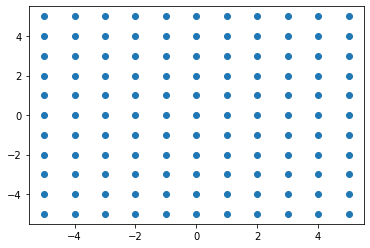

In [21]:
plt.scatter(xx, yy)

In [22]:
# 各点ごとの値を用意
data = xx**2 - yy**2 #格子点ごとのデータを作成
print(data)

[[  0  -9 -16 -21 -24 -25 -24 -21 -16  -9   0]
 [  9   0  -7 -12 -15 -16 -15 -12  -7   0   9]
 [ 16   7   0  -5  -8  -9  -8  -5   0   7  16]
 [ 21  12   5   0  -3  -4  -3   0   5  12  21]
 [ 24  15   8   3   0  -1   0   3   8  15  24]
 [ 25  16   9   4   1   0   1   4   9  16  25]
 [ 24  15   8   3   0  -1   0   3   8  15  24]
 [ 21  12   5   0  -3  -4  -3   0   5  12  21]
 [ 16   7   0  -5  -8  -9  -8  -5   0   7  16]
 [  9   0  -7 -12 -15 -16 -15 -12  -7   0   9]
 [  0  -9 -16 -21 -24 -25 -24 -21 -16  -9   0]]


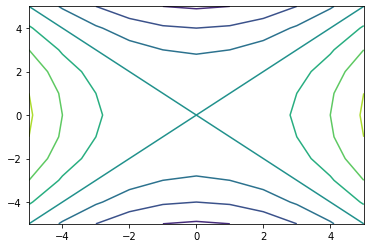

In [23]:
# 等高線を描画
fix, ax = plt.subplots()
plt.contour(x, y, data) #等高線をプロット
plt.show() #画像の表示

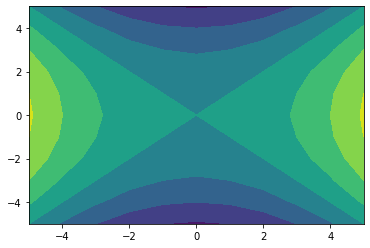

In [24]:
plt.contourf(x, y, data) #等高線をプロット
plt.show() #画像の表示

# 日本語に対応させる

(1) IPAexGothicフォントがあるかを確認する
`fc-list | grep IPA`

(2) 無ければインストールする

(3) もってきたフォントファイル（*.ttf）を所定の位置に置く

(3-a) macであれば、/Library/Fonts/以下に置く （/System/Library/Fonts/以下はシステム固有のフォントの置き場所のために触らないように。）

(4) 恒久的に変えるのであれば、matplotlibの設定ファイルを触る

In [25]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

(4-a) matplotlibrcの中の `font.family`を狙いのフォント名に置き換える

(4-b) アドホックにするのであれば以下をスクリプトに毎回記入

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

# Examples

## 棒グラフ

### 積み上げ棒グラフ

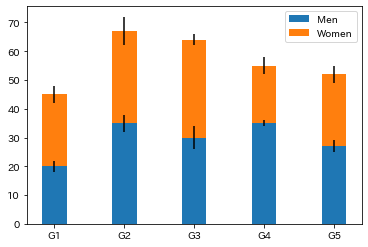

In [27]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']

means_1 = [20, 35, 30, 35, 27]
means_2 = [25, 32, 34, 20, 25]
std_1 = [2, 3, 4, 1, 2]
std_2 = [3, 5, 2, 3, 3]

width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, means_1, width, yerr=std_1, label='Men')
ax.bar(labels, means_2, width, yerr=std_2, bottom=means_1, label='Women')

ax.legend()

plt.show()

ラベルの位置    :  [0 1 2 3 4]


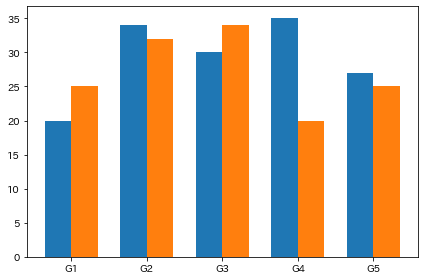

In [28]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']

means_1 = [20, 34, 30, 35, 27]
means_2 = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
print("ラベルの位置    : ", x)

width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,  means_1, width)
rects2 = ax.bar(x + width/2, means_2, width)

ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()

## DataFrameから横並びの棒グラフを作る

列ごとにデータの種類を分け、行ごとに横軸にプロットされる。

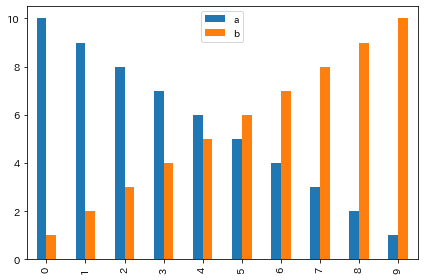

In [37]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

df = pd.DataFrame({
    "a" : [10,9,8,7,6,5,4,3,2,1],
    "b" : [1,2,3,4,5,6,7,8,9,10],
})

fig, axes = plt.subplots()
df.plot.bar(ax=axes)

plt.tight_layout()
plt.show()

# FAQ

## 範囲外にプロットされてしまう

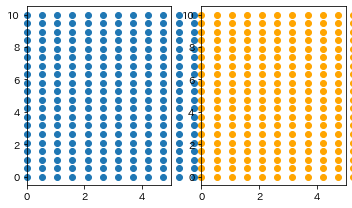

In [29]:
fig = plt.figure(figsize=(5,3))

axes = fig.add_subplot(1,2,1)

x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
xx, yy = np.meshgrid(x, y)

axes.scatter(xx,yy, clip_on=False)
axes.set_xlim(0,5)

axes = fig.add_subplot(1,2,2)
axes.scatter(xx,yy, clip_on=False, color="orange")
axes.set_xlim(0,5)

plt.tight_layout()
plt.show()